## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merge_data["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all=merge_data[merge_data.duplicated(["Mouse ID"])]
duplicate_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df["Mouse ID"].count()
clean_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat = pd.DataFrame({'Tumor Volume (mm3) Mean':tumor_vol_mean,
                           'Tumor Volume (mm3) Median':tumor_vol_median,
                           'Tumor Volume Variance':tumor_vol_var,
                           'Tumor Volume Standard Deviation':tumor_vol_std,
                           'Tumor Volume SEM':tumor_vol_sem})
summary_stat


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat2 = merge_data.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_stat2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

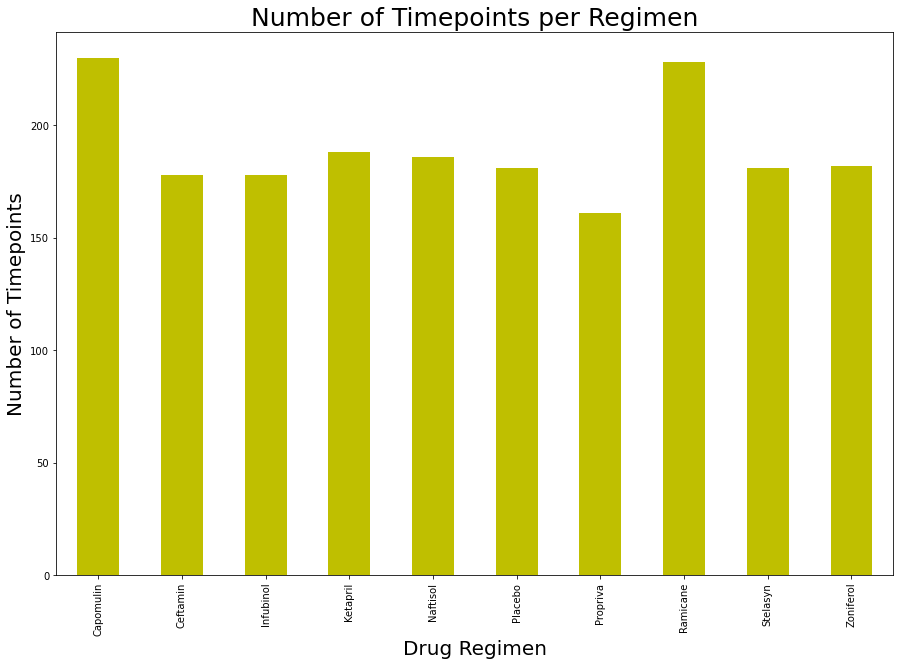

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoints = merge_data.groupby(["Drug Regimen"]).count()["Timepoint"]
regimen_timepoints
pd_plot = regimen_timepoints.plot.bar(figsize=(15,10),color = 'y')
plt.title("Number of Timepoints per Regimen",fontsize=25)
plt.xlabel("Drug Regimen",fontsize=20)
plt.ylabel("Number of Timepoints",fontsize=20)
plt.show()

Text(0, 0.5, 'Number of Timepoints')

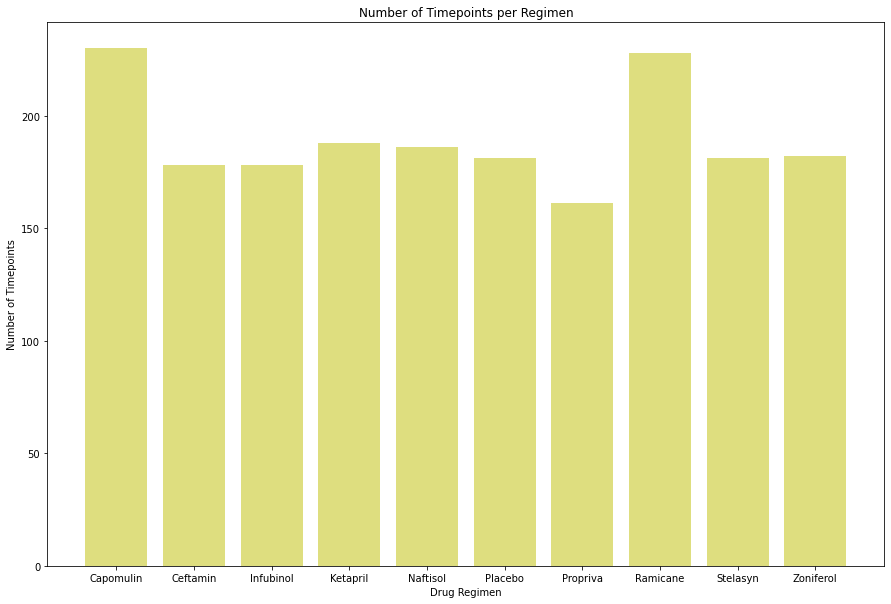

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_list = summary_stat.index.tolist()
timepoint_list = (merge_data.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
x_axis = np.arange(len(timepoint_list))
x_axis = regimen_list
plt.figure(figsize=(15,10))
plt.bar(x_axis, timepoint_list, color='y', alpha=0.5, align="center")
plt.title("Number of Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0.5, 1.0, 'Male & Female Mice Percentage')

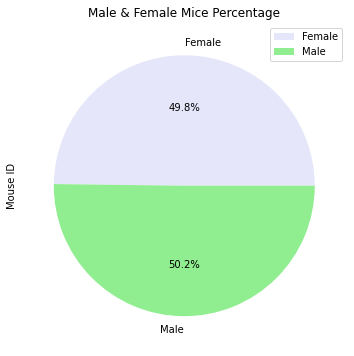

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_2 = gender_df[["Sex","Mouse ID"]]
gender_2.head()
colors = ["lavender","lightgreen"]
plt.figure(figsize=(10,6))
ax1 = plt.subplot(aspect="equal")
gender_2.plot(kind="pie", y = "Mouse ID",ax=ax1, autopct='%1.1f%%',colors = colors, labels=gender_df["Sex"])

plt.title("Male & Female Mice Percentage")

([<matplotlib.patches.Wedge at 0x7fdc5c89fca0>,
 [Text(-0.7771287477781478, -0.9143691319028482, 'Female'),
  Text(0.7123680187966356, 0.8381717042442774, 'Male')],
 [Text(-0.45332510287058614, -0.5333819936099948, '49.8%'),
  Text(0.3885643738890739, 0.457184565951424, '50.2%')])

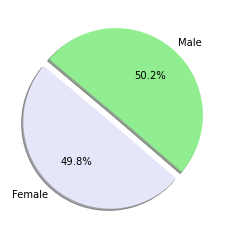

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [124,125]
colors = ["lavender","lightgreen"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merge_data.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_merge = merge_data.merge(last_timepoint,on=["Mouse ID","Timepoint"],how = "inner")
last_merge

Capomulin_df = last_merge.loc[last_merge["Drug Regimen"] == "Capomulin",:]
Ramicane_df = last_merge.loc[last_merge["Drug Regimen"] == "Ramicane", :]
Infubinol_df = last_merge.loc[last_merge["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = last_merge.loc[last_merge["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, last_merge, on=("Mouse ID","Timepoint"),how="left")
Cap_tumors = Capomulin_merge["Tumor Volume (mm3)"]

print(Cap_tumors)

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, last_merge, on=("Mouse ID","Timepoint"),how="left")
Ram_tumors = Ramicane_merge["Tumor Volume (mm3)"]
print(Ram_tumors)

Infubinol_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Capomulin_last)
Infubinol_merge = pd.merge(Capomulin_vol, last_merge, on=("Mouse ID","Timepoint"),how="left")
Infu_tumors = Infubinol_merge["Tumor Volume (mm3)"]
print(Infu_tumors)

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, last_merge, on=("Mouse ID","Timepoint"),how="left")
Ceft_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
print(Ceft_tumors)

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64
0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
Name: Tumor Volume (mm3), dtype: float64
0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Cap_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of Capomulin: {lower_quartile}")
print(f"The upper quartile of Capomulin: {upper_quartile}")
print(f"The interquartile range of Capomulin: {iqr}")
print(f"The median of Capomulin is: {quartiles[0.5]}")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for name in treatments:
    last_vol = last_merge.loc[last_merge["Drug Regimen"]==name,"Tumor Volume (mm3)"]
    
# add subset 
tumor_vol_data.append(last_vol)

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]

print(f"The potential outliers for Capomulin are below {lower_bound} and above {upper_bound}.")


The lower quartile of Capomulin: 32.37735684
The upper quartile of Capomulin: 40.1592203
The interquartile range of Capomulin: 7.781863460000004
The median of Capomulin is: 38.1251644
The potential outliers for Capomulin are below 20.70456164999999 and above 51.83201549.


In [15]:
quartiles = Ram_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of Ramicane: {lower_quartile}")
print(f"The upper quartile of Ramicane: {upper_quartile}")
print(f"The interquartile range of Ramicane: {iqr}")
print(f"The median of Ramicane is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]

print(f"The potential outliers for Ramicane are below {lower_bound} and above {upper_bound}.")


The lower quartile of Ramicane: 31.56046955
The upper quartile of Ramicane: 40.65900627
The interquartile range of Ramicane: 9.098536719999998
The median of Ramicane is: 36.56165229
The potential outliers for Ramicane are below 17.912664470000003 and above 54.30681135.


In [16]:
quartiles = Infu_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of Infubinol: {lower_quartile}")
print(f"The upper quartile of Infubinol: {upper_quartile}")
print(f"The interquartile range of Infubinol: {iqr}")
print(f"The median of Infubinol is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]

print(f"The potential outliers for Infubinol are below {lower_bound} and above {upper_bound}.")

The lower quartile of Infubinol: 32.37735684
The upper quartile of Infubinol: 40.1592203
The interquartile range of Infubinol: 7.781863460000004
The median of Infubinol is: 38.1251644
The potential outliers for Infubinol are below 20.70456164999999 and above 51.83201549.


In [17]:
quartiles = Ceft_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of Ceftamin: {lower_quartile}")
print(f"The upper quartile of Ceftamin: {upper_quartile}")
print(f"The interquartile range of Ceftamin: {iqr}")
print(f"The median of Ceftamin is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = last_vol.loc[(last_vol < lower_bound) | (last_vol > upper_bound)]

print(f"The potential outliers for Ceftamin are below {lower_bound} and above {upper_bound}.")

The lower quartile of Ceftamin: 48.72207785
The upper quartile of Ceftamin: 64.29983003
The interquartile range of Ceftamin: 15.577752179999997
The median of Ceftamin is: 59.85195552
The potential outliers for Ceftamin are below 25.355449580000002 and above 87.66645829999999.


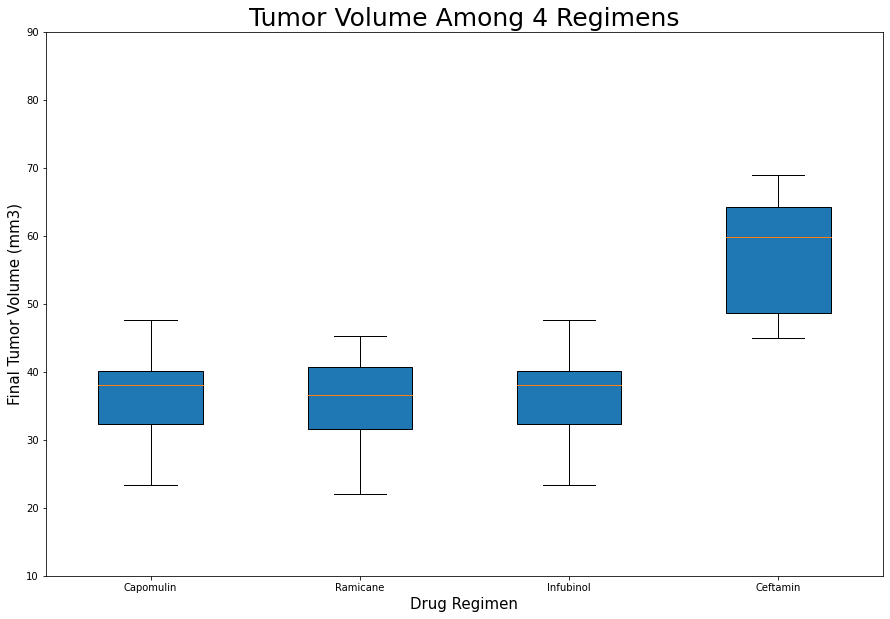

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Cap_tumors, Ram_tumors, Infu_tumors, Ceft_tumors]
plt.subplots(figsize=(15, 10))
plt.title('Tumor Volume Among 4 Regimens',fontsize =25)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 15)
plt.xlabel('Drug Regimen',fontsize = 15)
plt.boxplot(data, labels=treatments, widths = 0.5, patch_artist=True,vert=True)

plt.ylim(10, 90)

plt.show()



## Line and Scatter Plots

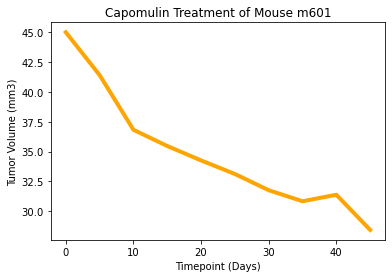

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = merge_data.loc[merge_data["Mouse ID"] == "m601",:]
line_df
x_axis_tp = line_df["Timepoint"]
tum_vol = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tum_vol, color = 'orange', linewidth = 4)
plt.title('Capomulin Treatment of Mouse m601')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

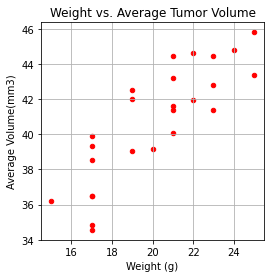

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin",:]
cap_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_df.head()

avg_cap =  pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume(mm3)"})
avg_cap


avg_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume(mm3)", grid=True, color='red', figsize=(4,4),
              title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap['Weight (g)'],avg_cap['Average Volume(mm3)'])
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

The correlation between weight and average tumor volume is 0.84


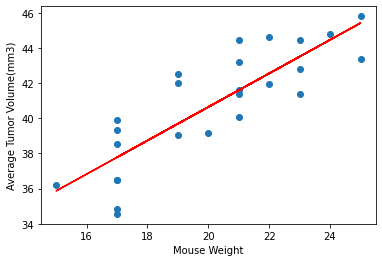

In [27]:
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Average Volume(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()

##Observations and Insights
1. The correlation between weight and average tumor volume is 0.84, indicating there is a positive correlation. When weight increases, the average tumor volume increases as well.
2. In the case of mouse m601, the line plot shows tumor volume decreasing over the timepoints, 40 days. This can indicate the regimen Capomulin reduced the volume of the tumor over time. 
3. The drug Ceftamin showed higher values of Tumor Volume in the final timepoint than the other 3 regimens (Capomulin, Remicane, Infubinol). This could indicate that Ceftamin is not as effective in decreasing tumor size.